In [111]:
%run paths.ipynb
%run preprocess.ipynb

In [ ]:
p = parseNeuralSum()

In [ ]:
p.parse_folder_1(input_folder=CONFIG.RAW_CNN_TRAIN_FOLDER, target_document_folder=CONFIG.CNN_TRAIN_DOCUMENTS_FOLDER, 
                 target_output_folder=CONFIG.CNN_TRAIN_OUTPUT_FOLDER, target_summary_folder=CONFIG.CNN_TRAIN_SUMMARY_FOLDER)
p.parse_folder_1(input_folder=CONFIG.RAW_CNN_TEST_FOLDER, target_document_folder=CONFIG.CNN_TEST_DOCUMENTS_FOLDER, 
                 target_output_folder=CONFIG.CNN_TEST_OUTPUT_FOLDER, target_summary_folder=CONFIG.CNN_TEST_SUMMARY_FOLDER)
p.parse_folder_1(input_folder=CONFIG.RAW_CNN_VALIDATION_FOLDER, target_document_folder=CONFIG.CNN_VALIDATION_DOCUMENTS_FOLDER, 
                 target_output_folder=CONFIG.CNN_VALIDATION_OUTPUT_FOLDER, target_summary_folder=CONFIG.CNN_VALIDATION_SUMMARY_FOLDER)

In [112]:
g = NeuralSumGlove(glove_filename=CONFIG.GLOVE_FILENAME)

In [113]:
g.convert_to_indices_(document_folder=CONFIG.CNN_TRAIN_DOCUMENTS_FOLDER, output_folder=CONFIG.CNN_TRAIN_OUTPUT_FOLDER, 
                     dump_file=CONFIG.CNN_TRAIN_DUMP)
g.convert_to_indices_(document_folder=CONFIG.CNN_TEST_DOCUMENTS_FOLDER, output_folder=CONFIG.CNN_TEST_OUTPUT_FOLDER, 
                     dump_file=CONFIG.CNN_TEST_DUMP)
g.convert_to_indices_(document_folder=CONFIG.CNN_VALIDATION_DOCUMENTS_FOLDER, output_folder=CONFIG.CNN_VALIDATION_OUTPUT_FOLDER, 
                     dump_file=CONFIG.CNN_VALIDATION_DUMP)

In [114]:
g.dump_all(CONFIG.GLOVE_CACHE_FILENAME)

In [115]:
d = NeuralSumDataHandler()

In [116]:
d.load_dump(CONFIG.CNN_TRAIN_DUMP)
d.pad(output=True)
d.padded_dump(CONFIG.CNN_PADDED_TRAIN_DUMP)

**RUN FROM HERE**

In [117]:
d = NeuralSumDataHandler()
d.load_padded_dump(CONFIG.CNN_PADDED_TRAIN_DUMP)
d.make_batches(20)

In [118]:
g = NeuralSumGlove(dump_filename=CONFIG.GLOVE_CACHE_FILENAME)

In [156]:
%run model.ipynb

In [157]:
torch.cuda.set_device(0)

In [158]:
m = EncoderDecoder(g.vectors, word_emb_size=g.dim, sen_emb_size=150, doc_emb_size=200, sen_len=50, batch_size=20, output_dim=1)
m.cuda()

EncoderDecoder(
  (sentenceEncoder): LSTMSentenceEncoderParallel(
    (embeddings): Embedding(400001, 100, padding_idx=400000)
    (sentenceEncoder): LSTM(100, 150, batch_first=True)
  )
  (documentEncoder): LSTM(150, 200, batch_first=True)
  (documentDecoder): LSTM(150, 200, batch_first=True)
  (classifier): Linear(in_features=200, out_features=1, bias=True)
)

In [159]:
%run utils.ipynb

RuntimeError: invalid argument 2: size '[20 x -1 x 150]' is invalid for input with 10200 elements at /pytorch/aten/src/TH/THStorage.cpp:80

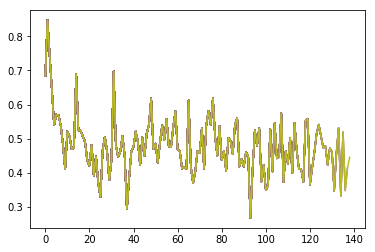

In [160]:
train_classifier(model=m, lines=d.lines, output=d.output, batches=d.batches)

In [146]:
len(d.lines[71541])

43